In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

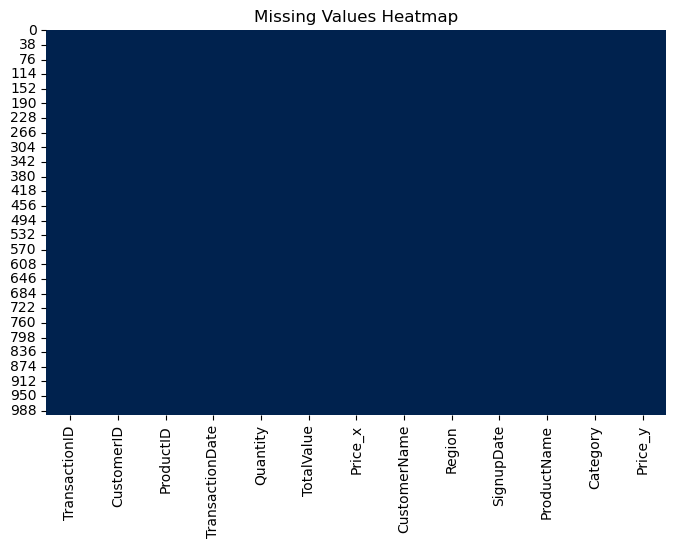

In [9]:
# 1. Missing values analysis
missing_values = merged_data.isnull().sum()
plt.figure(figsize=(8, 5))
sns.heatmap(merged_data.isnull(), cbar=False, cmap="cividis")
plt.title("Missing Values Heatmap")
plt.show()

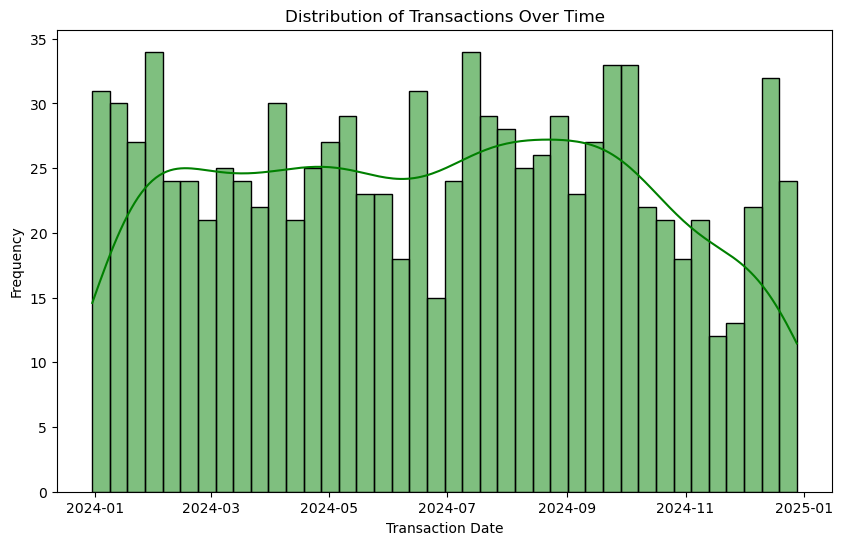

In [11]:
# 2. Distribution of Transactions by Date
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TransactionDate'], bins=40, kde=True, color="green")
plt.title("Distribution of Transactions Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_30856\2114098153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="Accent")


([0, 1, 2, 3],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Asia')])

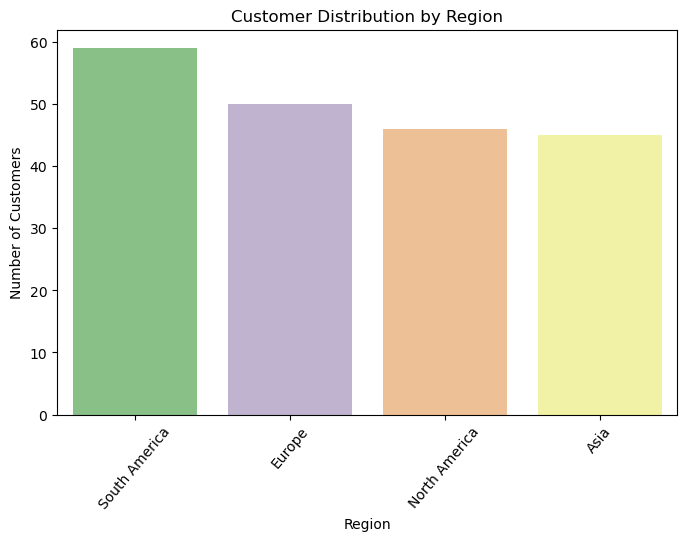

In [13]:
# 3. Top Regions by Customer Count
top_regions = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="Accent")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=50)

C:\Users\Hp\AppData\Local\Temp\ipykernel_30856\3307497176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


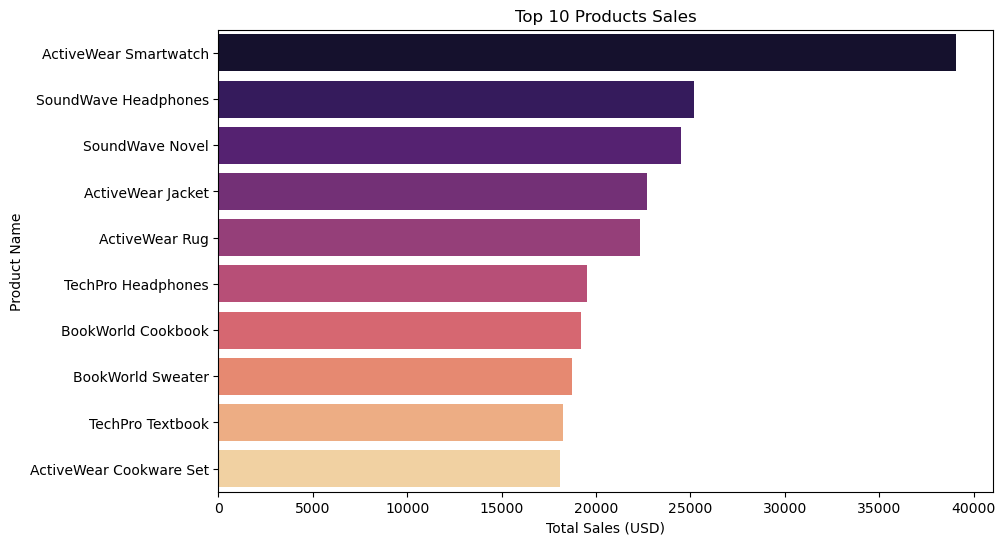

In [15]:
# 4. Top Products by Sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Products Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.show()

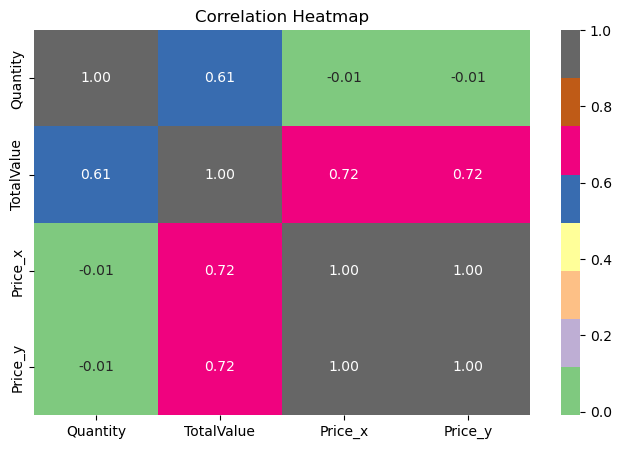

In [17]:
# 5. Correlation Heatmap
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 5))
sns.heatmap(merged_data[numeric_columns].corr(), annot=True, cmap="Accent", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

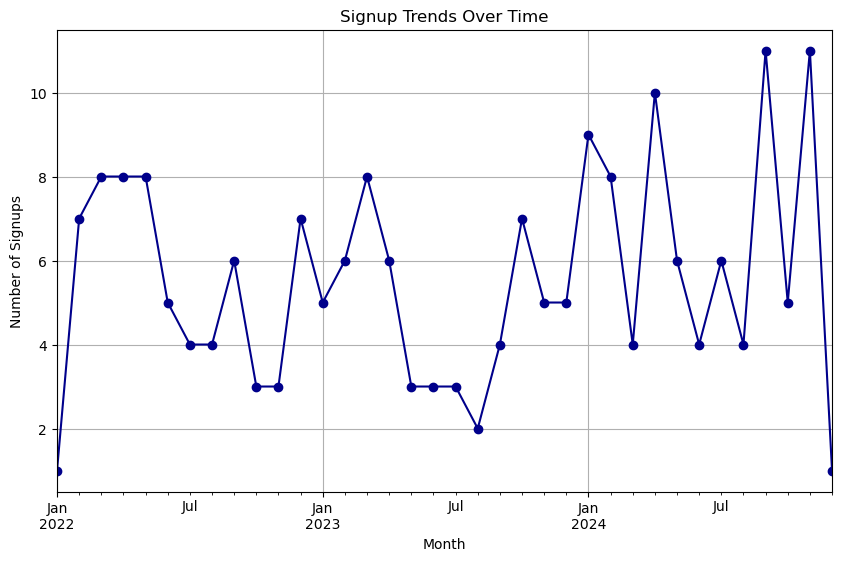

In [19]:
# 6. Signup Trends
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color="darkblue")
plt.title("Signup Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

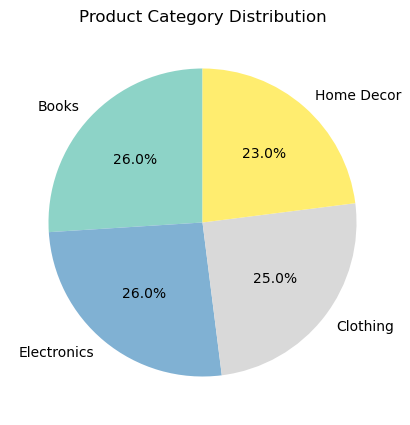

In [21]:
# 7. Product Category Distribution
if 'Category' in products.columns:  # Check if the Category column exists
    category_distribution = products['Category'].value_counts()
    plt.figure(figsize=(8, 5))
    category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3")
    plt.title("Product Category Distribution")
    plt.ylabel("")
    plt.show()

In [23]:
#Deriving Business Insights from EDA


# 1. Insight: Customer Distribution by Region
top_regions = customers['Region'].value_counts()
print("Insight 1: Customer Distribution by Region")
print(f"Most customers are from the region: {top_regions.idxmax()} with {top_regions.max()} customers.")
print(f"Least customers are from the region: {top_regions.idxmin()} with {top_regions.min()} customers.")


Insight 1: Customer Distribution by Region
Most customers are from the region: South America with 59 customers.
Least customers are from the region: Asia with 45 customers.


In [25]:
# 2. Insight: Top Products by Sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nInsight 2: Top 5 Products Sales")
print("These products generate the highest revenue:")
print(top_products)


Insight 2: Top 5 Products Sales
These products generate the highest revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [27]:
# 3. Insight: Signup Trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
most_signups_month = signup_trends.idxmax()
print(f"\nInsight 3: Customer Signup Trends")
print(f"The month with the highest signups is {most_signups_month} with {signup_trends.max()} signups.")
print("Focusing marketing efforts in similar periods can maximize user acquisition.")


Insight 3: Customer Signup Trends
The month with the highest signups is 2024-09 with 11 signups.
Focusing marketing efforts in similar periods can maximize user acquisition.


In [29]:
# 4. Insight: Transaction Trends Over Time
transaction_trends = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
most_transactions_month = transaction_trends.idxmax()
print(f"\nInsight 4: Transaction Trends")
print(f"The highest transaction volume occurred in {most_transactions_month} with {transaction_trends.max()} transactions.")
print("Analyzing factors behind this spike can help replicate success in other months.")


Insight 4: Transaction Trends
The highest transaction volume occurred in 2024-01 with 107 transactions.
Analyzing factors behind this spike can help replicate success in other months.


In [31]:
# 5. Insight: High Revenue Product Categories (if available)
if 'Category' in products.columns:
    category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    print("\nInsight 5: High Revenue Product Categories")
    print("Categories generating the most revenue:")
    print(category_revenue.head(3))
else:
    print("\nInsight 5: Product Category data not available in the dataset.")



Insight 5: High Revenue Product Categories
Categories generating the most revenue:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Name: TotalValue, dtype: float64
